# <center> HEART DISEASE PREDICTION </center>

Heart disease prediction using 3 machine learning models.
1. Support Vector Machine  
2. ANN Multilayer Perceptron

## DATA DESCRIPTION

South Africa Heart Disease Dataset
Source:<br>
https://web.stanford.edu/~hastie/ElemStatLearn//data.html<br>
https://www.openml.org/d/1498


A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical
Journal. 

Attributes:

1. sbp systolic blood pressure 
2. tobacco cumulative tobacco (kg) 
3. ldl low densiity lipoprotein cholesterol 
4. adiposity 
5. famhist family history of heart disease (Present, Absent) 
6. typea type-A behavior 
7. obesity 
8. alcohol current alcohol consumption 
9. age age at onset 
10. chd response, coronary heart disease 

In [1]:
# Importing primary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### DATA PREPROCESSING  

In [2]:
# Reading the data 
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [3]:
# Setting up the column
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [4]:
data.columns=column

In [5]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [6]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


Describes the statistical data insights

In [7]:
# Checking for any missing values 
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

The values shown are 0, therefore no missing values in the DataFrame

In [8]:
# Feature Scaling, making categorical data precise 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [9]:
data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

In [11]:
# setting scale of max min value for sbp in range of 0-100, normalise
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [12]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [13]:
# Data after modification
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903282,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518220,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658120,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205128,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170940,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,100.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


The variation of values across the DataFrame for first 50 values

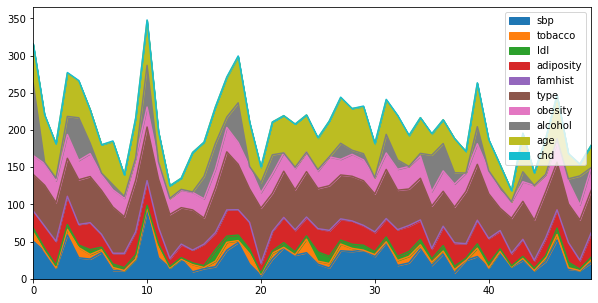

In [14]:
data.head(50).plot(kind='area',figsize=(10,5))

Distribution of Obesity according to the age

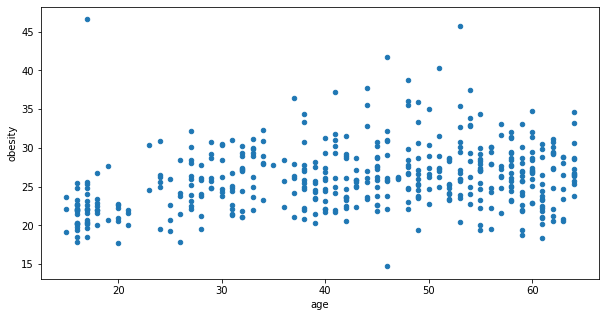

In [15]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5))

Distribution of Tobacco consumption across age

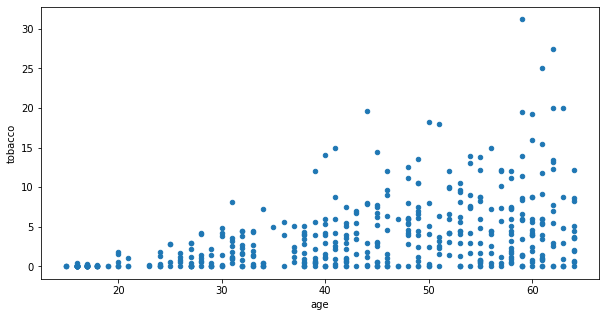

In [16]:
data.plot(x='age',y='tobacco',kind='scatter',figsize =(10,5))

Distribution of Alcohol consumption across age

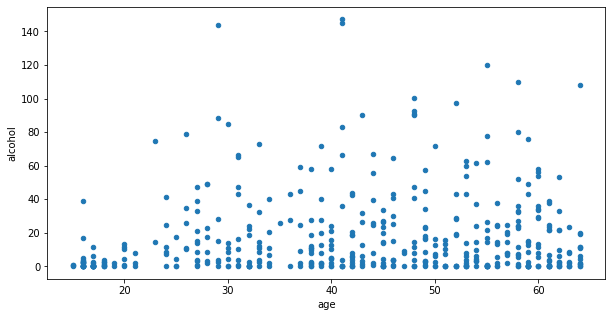

In [17]:
data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5))

Histogram of various freatures in DataFrame

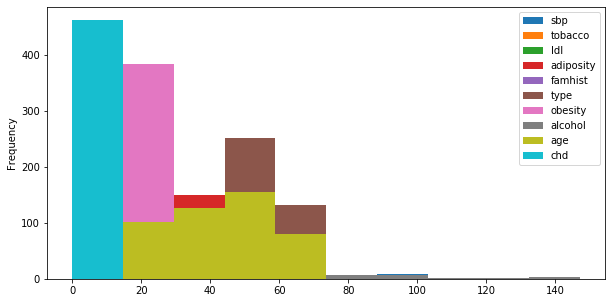

In [18]:
data.plot(kind = 'hist',figsize =(10,5))

Box graph of the Features, representing:<br> Upper Extreme <br> Upper Quartile <br> Median <br> Lower Quartile <br> Lower Extreme

In [19]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

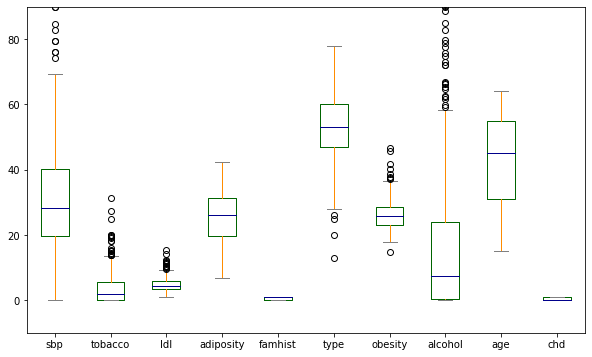

In [20]:
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90])

In [21]:
# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']
X_train, X_test, y_train, y_test = train_test_split(data[col], data['chd'], test_size=0.2, random_state=1234)

Heatmap Of the realtion features

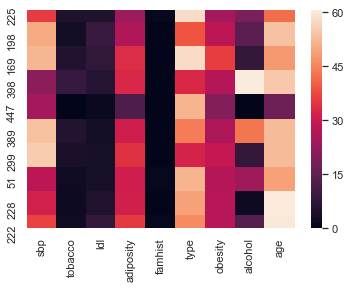

In [22]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [23]:
X_all = data[col]
y_all = data['chd']

Data preprocessing is complete,
implementing the models

# <center> MODEL 1 - Support Vector Machine</center>

In [24]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [25]:
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [26]:
y_pred_svm =svm_clf.predict(X_test)

In [27]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[51,  9],
       [15, 18]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.7419354838709677


In [30]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.85, 0.7391304347826086)

## Accuracy : 0.741
## Recall : 0.85
## Precision : 0.739

# MODEL 2 - ANN Multilayer Perceptron Classifier

### <center> ANN implementation using Scikit learn library </center>

In [31]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [32]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [33]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

In [34]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train, y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=14, random_state=1, solver='lbfgs')

In [35]:
y_pred_ann = ann_clf.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[50, 10],
       [16, 17]], dtype=int64)

In [37]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.7204301075268817

In [38]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.8333333333333334, 0.746268656716418)

## Accuracy : 0.763
## Recall : 0.33
## Precision : 0.746

## Comparison of models

In [39]:
results ={'Accuracy': [svm_result*100,ann_result*100],
          'Recall': [recall_svm*100,recall_ann*100],
          'Precision': [precision_svm*100,precision_ann*100]}
index = ['SVM','ANN']

In [40]:
results =pd.DataFrame(results,index=index)

Bar Plot of three model implemented<br>
X axis : Models<br>
Y axis : Values of Accuracy, Precision,Recall

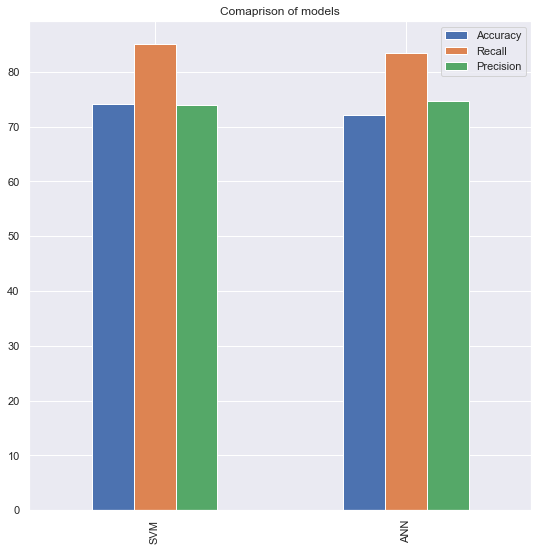

In [41]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')


Zoomed view having lower y limit 50, higher y limit 100, for better view 

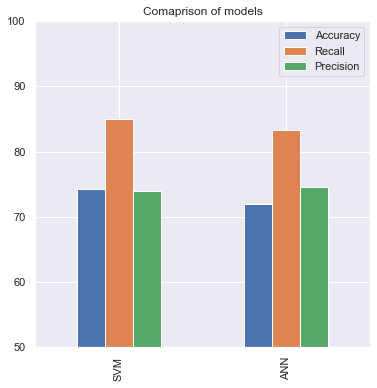

In [42]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(6,6),ylim=[50,100]).get_figure()
fig.savefig('image.png')

Subplot of each measure in between the models

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA0C0617C8>,
      dtype=object)

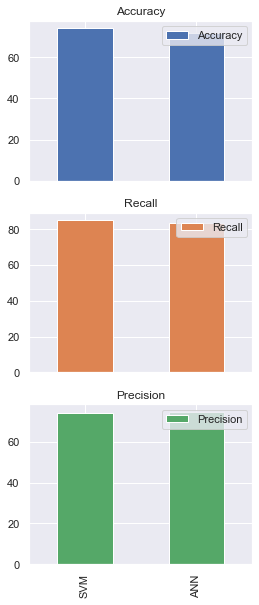

In [43]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))